## Building Prediction Model for Salary Hike

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Salary_Data.csv')

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
data[data.duplicated()].shape

(0, 2)

### Plotting the data to check outliers

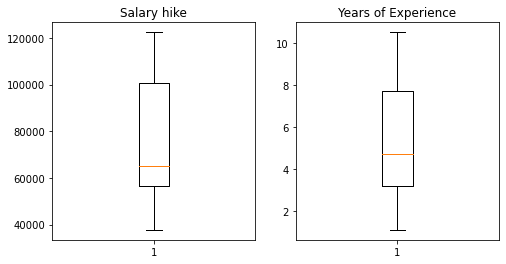

In [8]:
plt.subplots(figsize=(8,4))
plt.subplot(121)
plt.boxplot(data['Salary'])
plt.title('Salary hike')
plt.subplot(122)
plt.boxplot(data['YearsExperience'])
plt.title('Years of Experience')
plt.show()

## Correlation Analysis

In [9]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

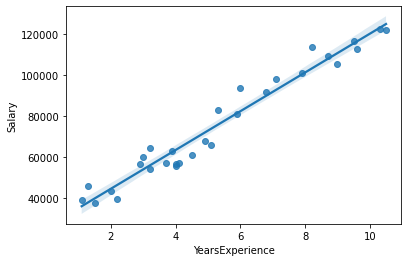

In [10]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

## Transformation of data to estimate Normal Distribution

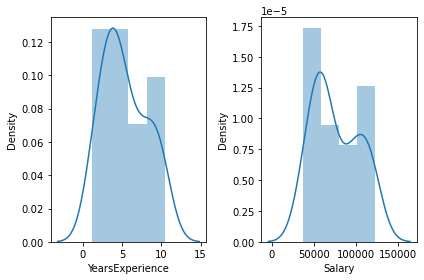

In [11]:
# Density plot for Experience and Salary
fig,ax=plt.subplots(1,2)
sns.distplot(data.iloc[:,0],ax=ax[0],label='Experience')
sns.distplot(data.iloc[:,1],ax=ax[1],label='Salary')
fig.show();
plt.tight_layout()

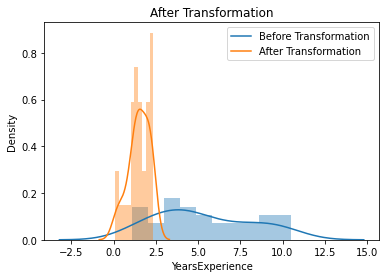

In [12]:
sns.distplot(data['YearsExperience'],bins=10,kde=True)
plt.title("Before Transformation")      
sns.distplot(np.log(data['YearsExperience']),bins=10,kde=True)    
plt.title("After Transformation")
labels=['Before Transformation','After Transformation']
plt.legend(labels)
plt.show()

Text(0.5, 1.0, 'Before Transformation')

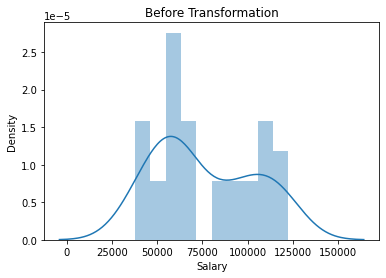

In [13]:
sns.distplot(data['Salary'],bins=10,kde=True)
plt.title("Before Transformation")

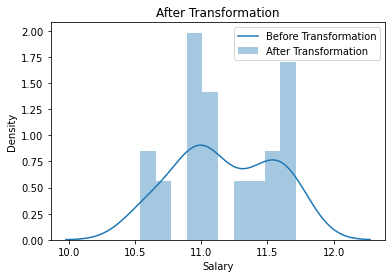

In [14]:
sns.distplot(np.log(data['Salary']),bins=10,kde=True)
plt.title('After Transformation')
plt.legend(labels)

## Model Building

In [15]:
model = smf.ols('Salary~YearsExperience',data=data).fit()

In [16]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [17]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [18]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

## Test for Normality of Residuals (Q-Q Plot)

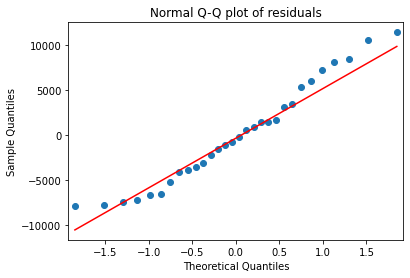

In [19]:
import statsmodels.api as sm

qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()                              #The model is normally distributed

## Model Prediction

In [20]:
predict=pd.DataFrame()
predict['YearsExperience']=data.YearsExperience
predict['Salary']=data.Salary
predict['Predicted_Salary_Hike']=pd.DataFrame(model.predict(predict))
predict

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
